In [14]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2
from backend import osaka_backend, transpiler_real_backend, sampler_real_backend, service
from utils import save_obj

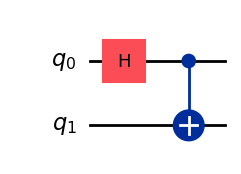

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl', idle_wires=False, fold=-1, filename="test-osaka-bell-state.png")

In [4]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 3
transpiled qc depth: 10


In [5]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: ctj3n6c4gjh0008ntypg


In [6]:
job_data = {"id":job.job_id()}
save_obj(job_data, "bell-state-job.json")

Saving object as JSON...


In [2]:
job = service.job("ctj3n6c4gjh0008ntypg")

In [3]:
results = job.result()[0].data.meas.get_counts()
results

{'00': 510, '11': 472, '01': 5, '10': 13}

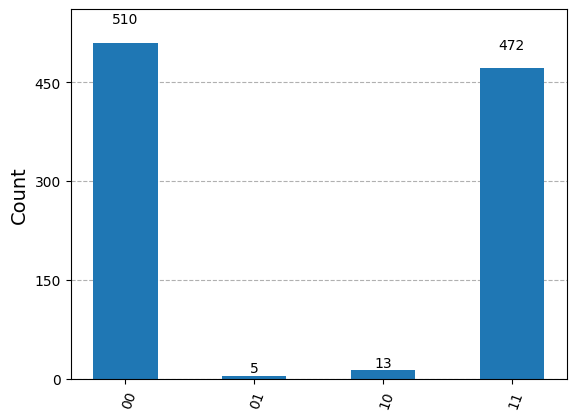

In [4]:
fig = plot_histogram(results)
fig.savefig("bell-state-counts.png", bbox_inches='tight')
display(fig)

---

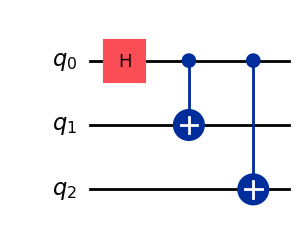

In [6]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw('mpl', idle_wires=False, fold=-1, filename="test-osaka-ghz-state.png")

In [7]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 4
transpiled qc depth: 12


In [8]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: ctjdktf4gjh0008nwdeg


In [9]:
job_data = {"id":job.job_id()}
save_obj(job_data, "ghz-state-osaka-test-job.json")

Saving object as JSON...


In [3]:
job = service.job("ctjdktf4gjh0008nwdeg")

In [4]:
results = job.result()[0].data.meas.get_counts()
results

{'000': 485,
 '111': 465,
 '101': 19,
 '011': 7,
 '010': 14,
 '110': 4,
 '100': 5,
 '001': 1}

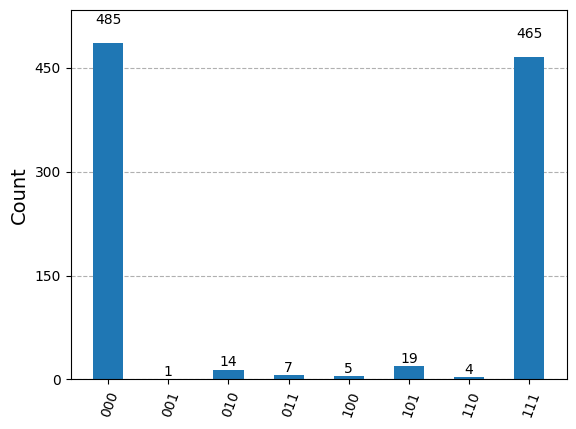

In [5]:
fig = plot_histogram(results)
fig.savefig("small-ghz-counts.png", bbox_inches='tight')
display(fig)

---

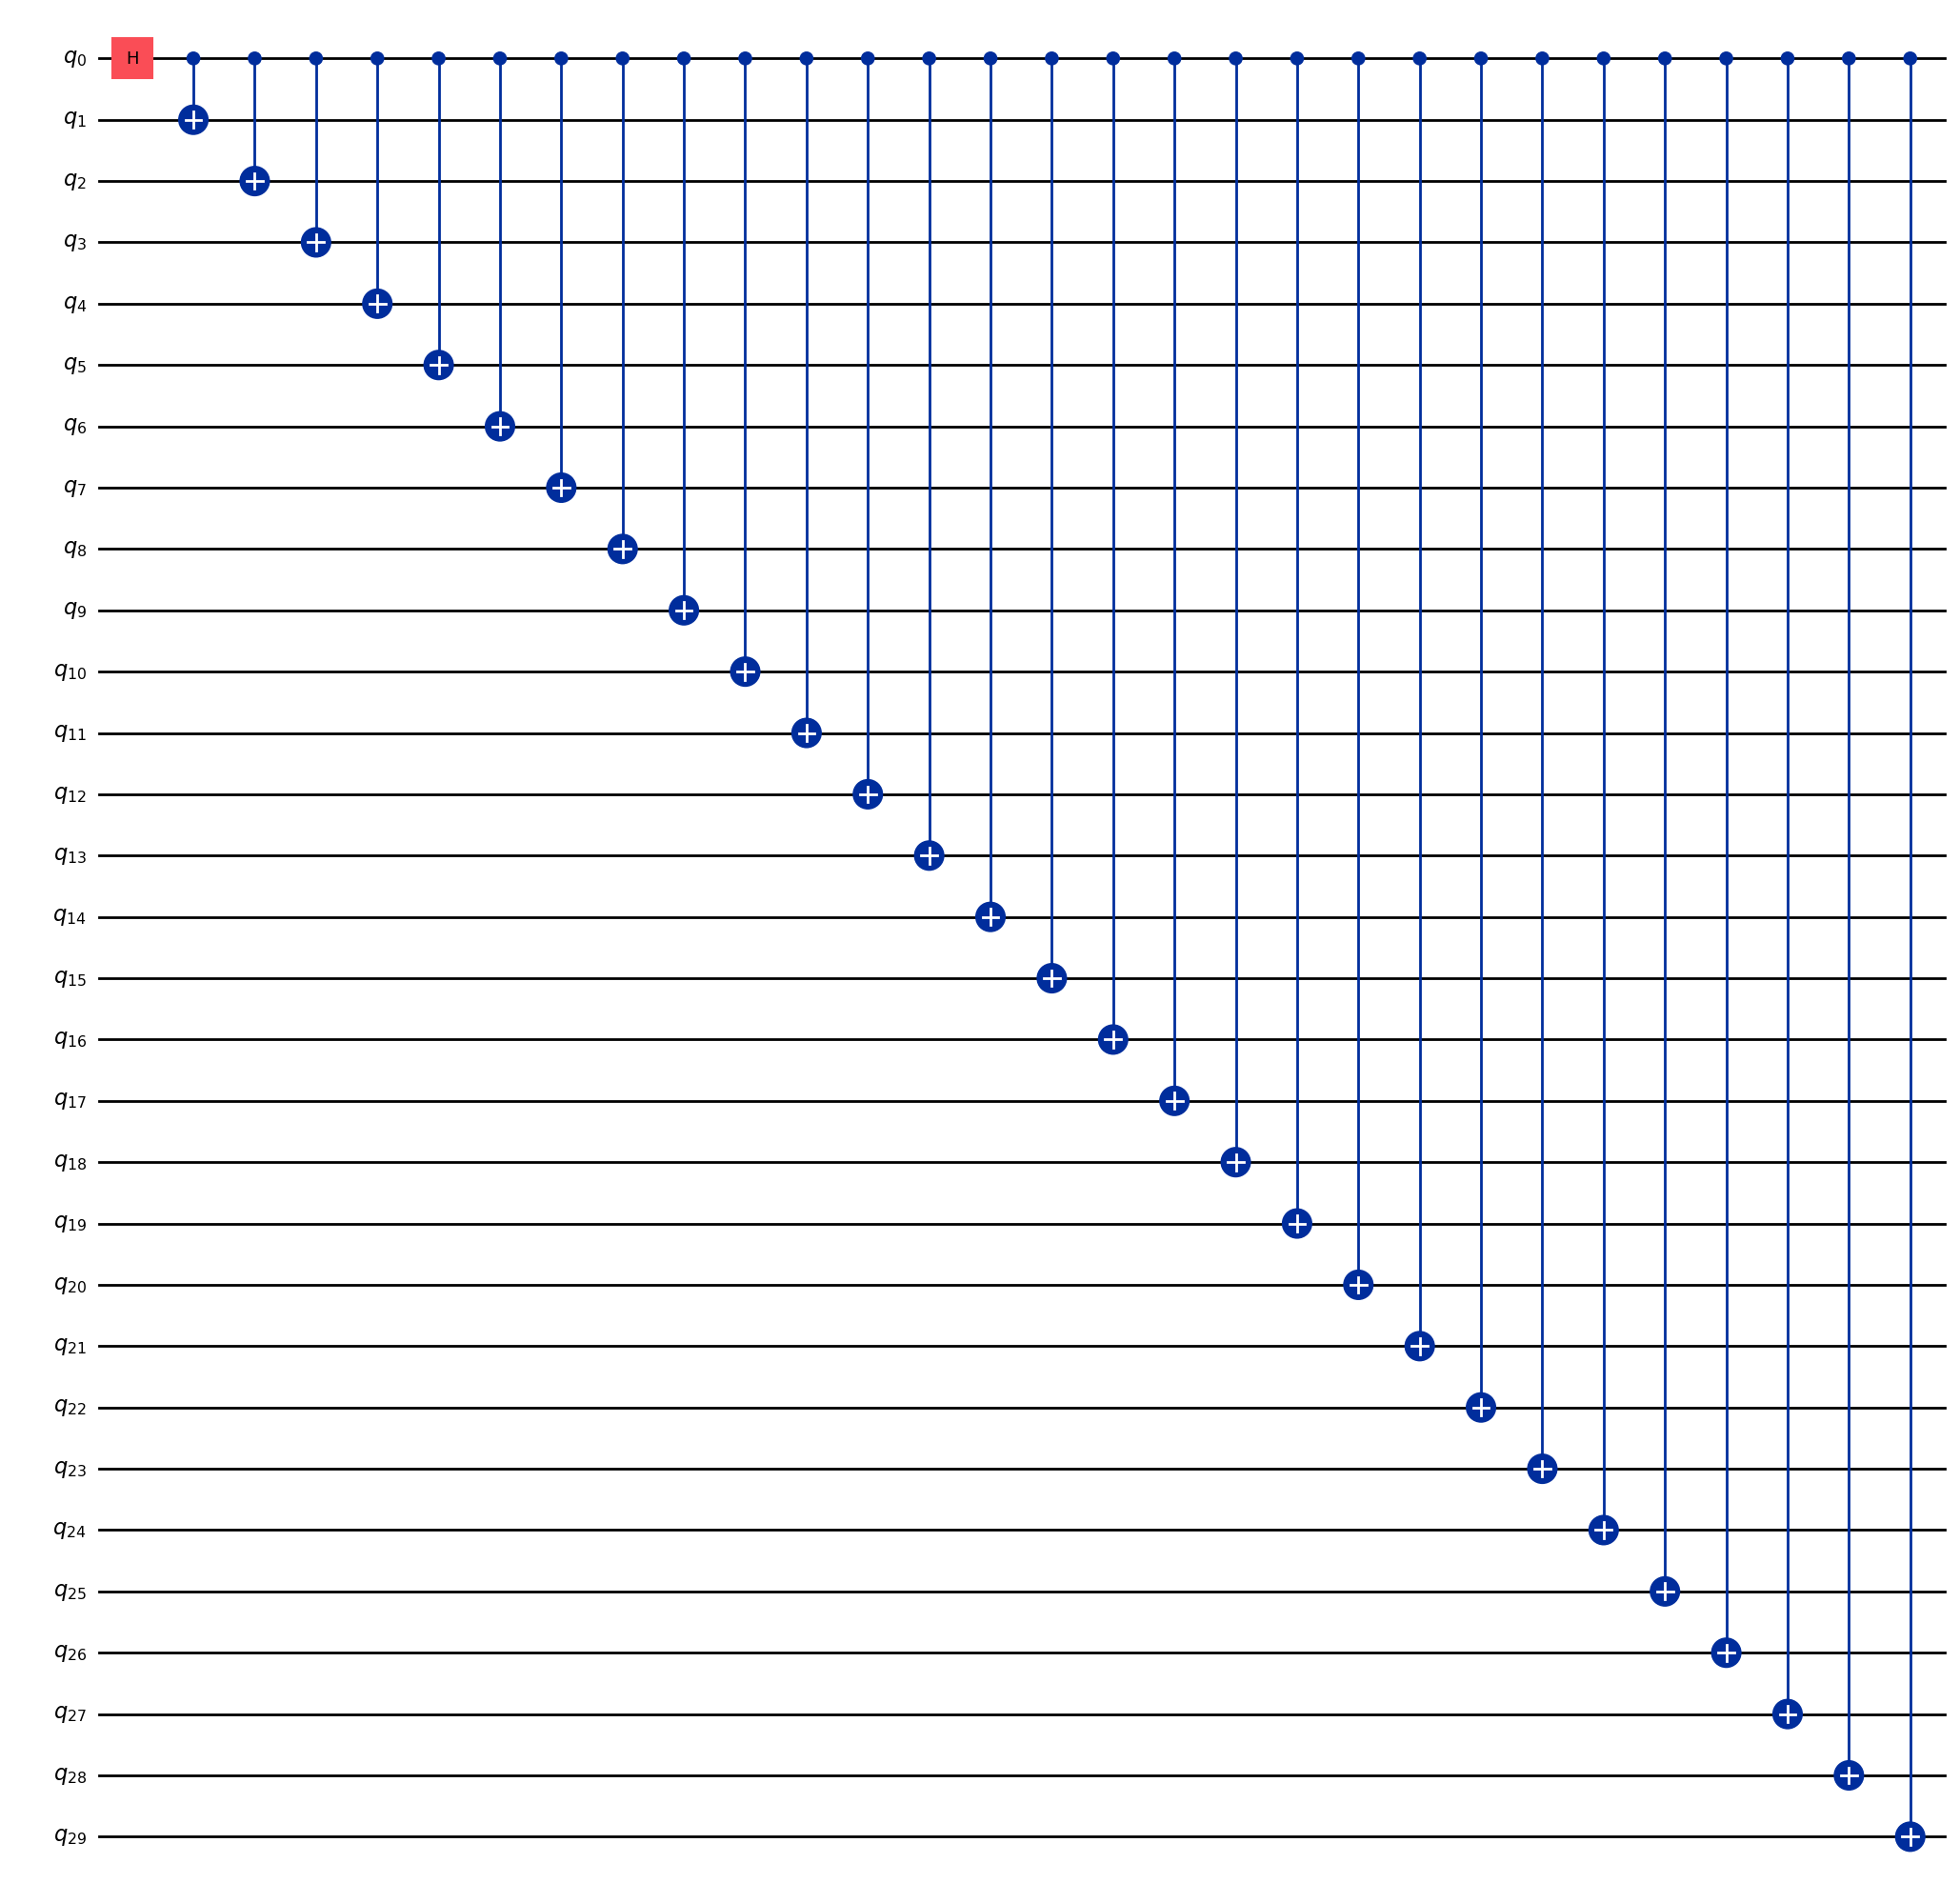

In [2]:
qc = QuantumCircuit(30)
qc.h(0)
for i in range(1,30):
    qc.cx(0, i)
qc.draw('mpl', idle_wires=False, fold=-1, filename="test-osaka-ghz-state-bigger.png")

In [7]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 31
transpiled qc depth: 364


In [8]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: ctjgbrzx7b5g008zy7ng


In [9]:
job_data = {"id":job.job_id()}
save_obj(job_data, "bigger-ghz-state-osaka-test-job.json")

Saving object as JSON...


In [11]:
job = service.job("ctjgbrzx7b5g008zy7ng")

In [12]:
results = job.result()[0].data.meas.get_counts()
results

{'000000011101011010100101001100': 1,
 '000000111101101011011011101110': 1,
 '101010101111101001010001001011': 1,
 '010000010111101111001001100100': 1,
 '111000001011000101100100001101': 1,
 '110010111000111001110100100101': 1,
 '010111010010111101001100100110': 1,
 '011111110110110101101011100000': 1,
 '111010001001010001110000000001': 1,
 '010001010010110101011100101100': 1,
 '010001110110101000111101100110': 1,
 '111001110000110011001011100101': 1,
 '010001111011000011110000100010': 1,
 '111011010010101100011111100111': 1,
 '101001010111101101101111011001': 1,
 '000100011111011111101000000000': 1,
 '010111011100000011001111111100': 1,
 '111000011010011000101101100111': 1,
 '111100110111001101110001000001': 1,
 '011001111101000110101000000110': 1,
 '000011100111101001000110001010': 1,
 '010000110010110111000010001010': 1,
 '101110101101101101100011101111': 1,
 '111110000010011101110101001101': 1,
 '101110010010110001101111010111': 1,
 '101001001011010101100001000001': 1,
 '0100100100

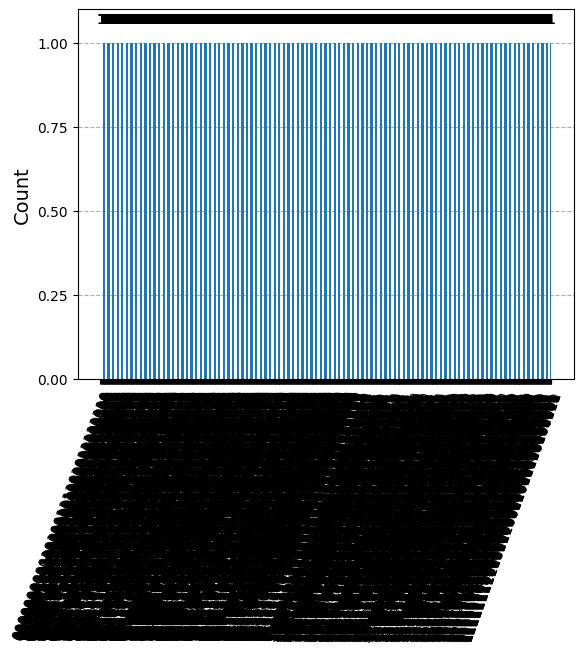

In [13]:
fig = plot_histogram(results)
fig.savefig("bigger-ghz-counts.png", bbox_inches='tight')
display(fig)

---

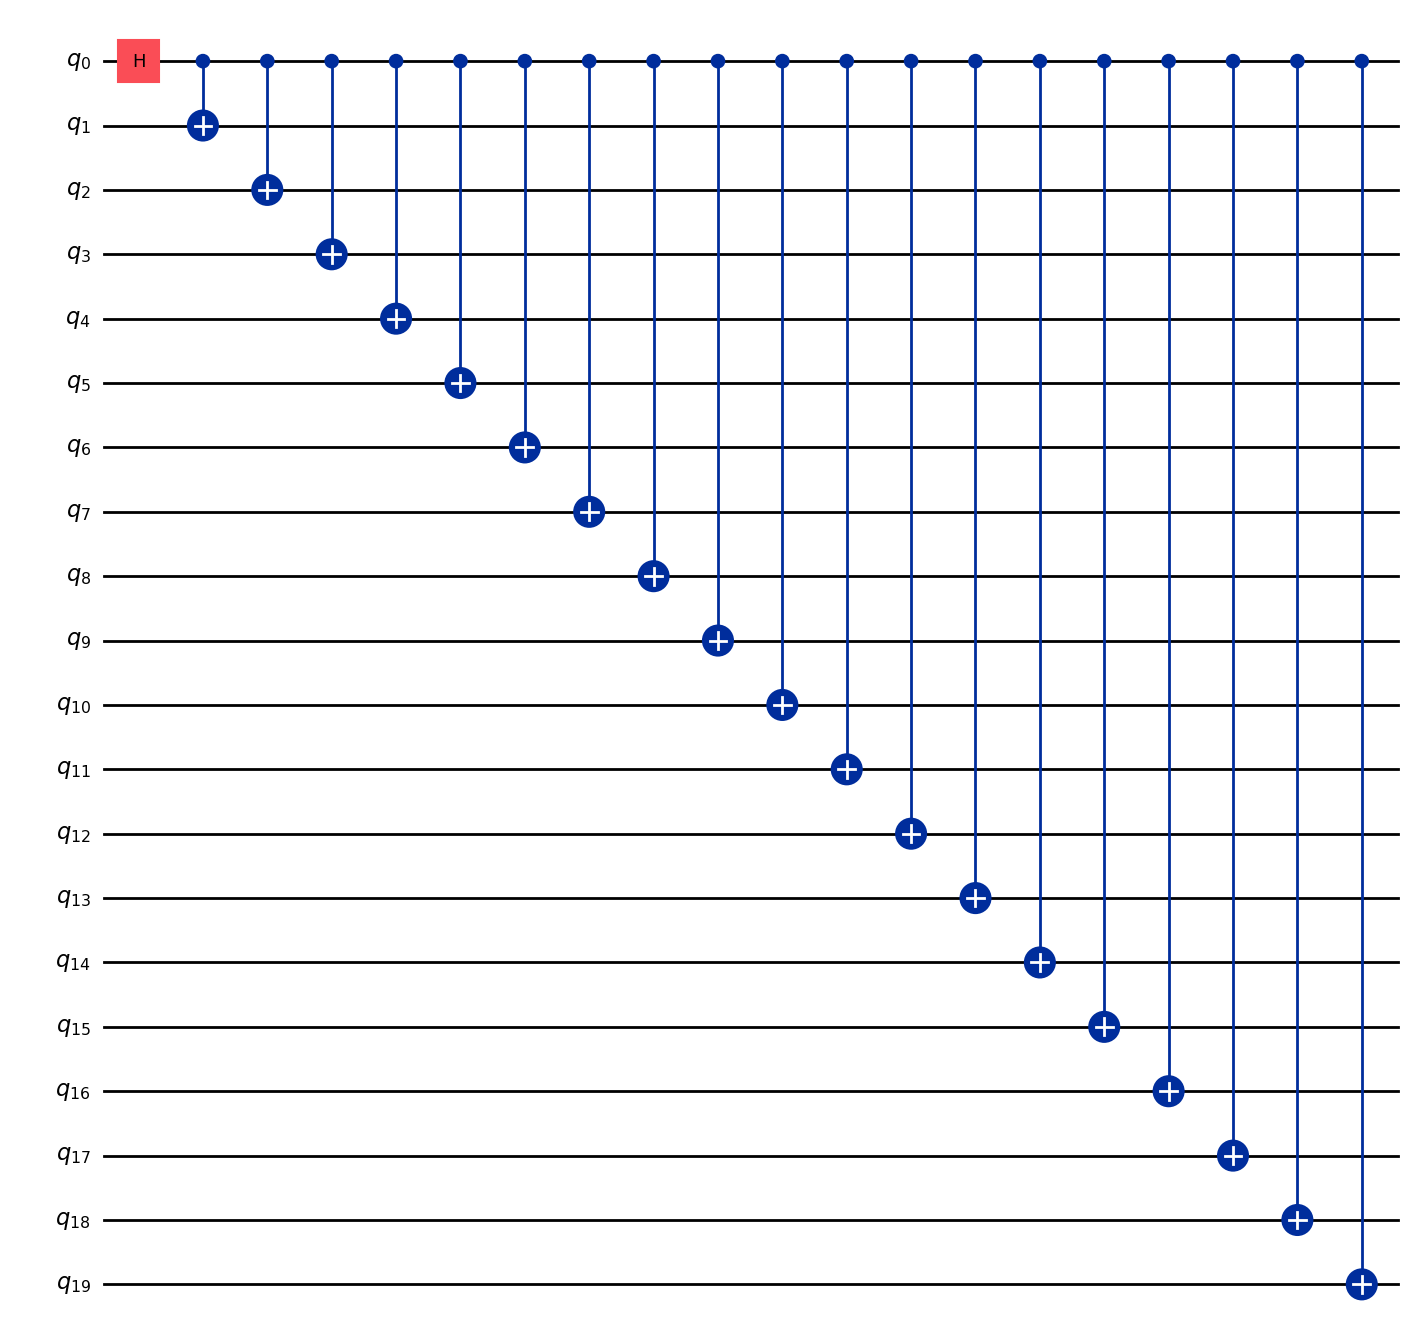

In [2]:
qc = QuantumCircuit(20)
qc.h(0)
for i in range(1,20):
    qc.cx(0, i)
qc.draw('mpl', idle_wires=False, fold=-1, filename="test-osaka-ghz-state-20-qubit.png")

In [3]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

In [4]:
qc.measure_all()
transpiled_qc = transpiler_real_backend.run(qc)
print(f'qc depth: {qc.depth()}')
print(f'transpiled qc depth: {transpiled_qc.depth()}')

qc depth: 21
transpiled qc depth: 195


In [5]:
job = sampler_real_backend.run([transpiled_qc], shots=1000)
print(f"Job ID: {job.job_id()}")

Job ID: ctjgfhy4gjh0008nx590


In [6]:
job_data = {"id":job.job_id()}
save_obj(job_data, "20-qubits-ghz-state-osaka-test-job.json")

Saving object as JSON...


In [7]:
job = service.job("ctjgfhy4gjh0008nx590")

In [8]:
results = job.result()[0].data.meas.get_counts()
results

{'00001000011011100000': 1,
 '00011000101001100000': 1,
 '00100010010010100100': 1,
 '00000000010001001010': 1,
 '11110101001101111011': 1,
 '00000010111000110100': 1,
 '11010101011001010100': 1,
 '11110111010011001000': 1,
 '10000000011011000001': 1,
 '01111101010100010100': 1,
 '00000010111100100000': 1,
 '11110111111101111010': 1,
 '11110101010111011010': 1,
 '00000000100001011000': 1,
 '11110101100110001011': 1,
 '10010110010111011011': 1,
 '00100010001001000000': 1,
 '00011000110111110010': 1,
 '11110111011101100000': 1,
 '01001010011011110100': 1,
 '00000010011001010010': 1,
 '11110111010100101010': 1,
 '11010111001000001100': 1,
 '11110011011100011011': 1,
 '00100000100000001010': 1,
 '11010101101110011010': 1,
 '11110100000111000110': 1,
 '00010111011101011011': 1,
 '00000010100000011101': 1,
 '11111111010100011100': 1,
 '00011000001011001000': 1,
 '00001110011011000100': 1,
 '11110101111111000011': 1,
 '11110111110101001011': 2,
 '01110111111111001011': 1,
 '100101110111011010

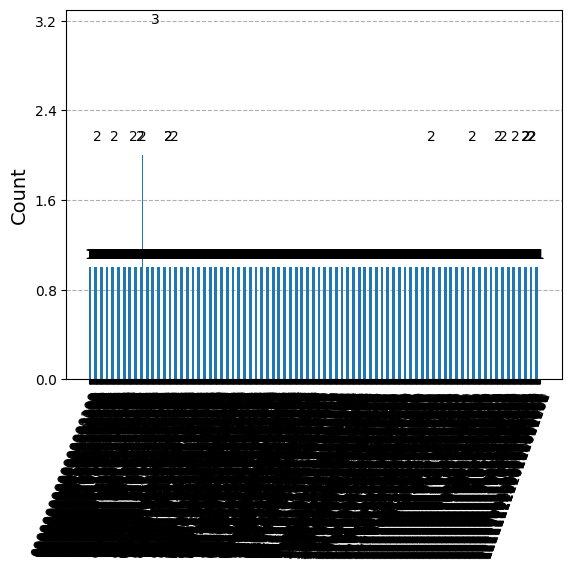

In [9]:
fig = plot_histogram(results)
fig.savefig("20-qubits-ghz-counts.png", bbox_inches='tight')
display(fig)

In [12]:
osaka_local_backend = AerSimulator.from_backend(osaka_backend)

In [15]:
osaka_local_sampler = SamplerV2(osaka_local_backend)

In [16]:
local_job = osaka_local_sampler.run([transpiled_qc], shots=1000)

In [20]:
results = local_job.result()[0].data.meas.get_counts()
results

{'00000001111111100000': 1,
 '11011111111111111111': 19,
 '00000000000000000000': 120,
 '01011111111111111111': 2,
 '11111111111101111111': 26,
 '00010000000000000000': 6,
 '11101000000000000001': 1,
 '11111110100000000001': 7,
 '11111011111111100001': 1,
 '01011111111111011110': 1,
 '00000000000000011110': 1,
 '11111000000000000001': 1,
 '11111111111111111110': 12,
 '11111110111111011110': 1,
 '01000000000000101110': 1,
 '00001000000101111110': 1,
 '01011110110111111110': 1,
 '11111110111101111110': 1,
 '11111101101111111111': 1,
 '11111111111111111111': 111,
 '11111111011111111111': 8,
 '00000000000100000000': 3,
 '00011111111110111110': 3,
 '10100000000000010001': 2,
 '10100000000000000001': 6,
 '00000101010111111111': 1,
 '11111101111110101111': 1,
 '11011111111111111011': 1,
 '00000000100000000000': 4,
 '10100000000000000000': 2,
 '01000000010100000000': 1,
 '00000000000000000110': 6,
 '10000100000001000001': 1,
 '11011111111111110001': 1,
 '11111111111111100111': 1,
 '11101111111

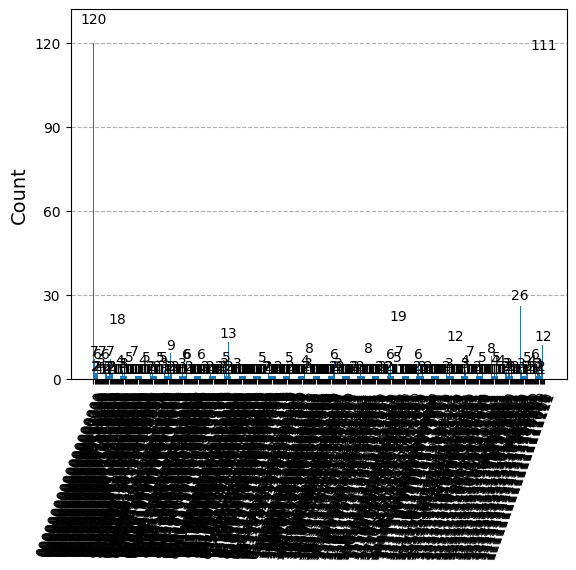

In [21]:
fig = plot_histogram(results)
fig.savefig("20-qubits-ghz-counts-local-job.png", bbox_inches='tight')
display(fig)